In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import string
import re
from collections import Counter
from nltk.corpus import stopwords



In [2]:
filename = '/home/iqra/testing-data.csv'

In [3]:
data_frame = pd.read_csv(filename , encoding='latin1',engine='c') 


In [4]:
data_frame.head(100)

,Author name,Article name,Type of article,abstract,Year,number of pages,column,page_range
0,NaN,Beta blocker heart attack trial: Design features,Controlled Clinical Trials,The Beta Blocker Heart Attack Trial (BHAT) is ...,1981,2,4,275-285
1,NaN,A randomized clinical study of cardiopulmonary...,American Journal of Emergency Medicine,The Brain Resuscitation Clinical Trial (BRCT) ...,1986,4,1,72-86
2,NaN,Implementation of a multicomponent process to ...,Controlled Clinical Trials,The Diabetes Control and Complications Trial (...,1989,10,1,83-96
3,NaN,Appraisal of the radiography of the knee as a ...,Revue du Rhumatisme et des Maladies Osteo-Arti...,Within the context of the initiation of practi...,1990,57,6,451-457
4,NaN,How good are volunteers at searching for publi...,Electronic Article,The Ottawa Stroke Trials Registry (OSTR) colle...,1995,NaN,NaN,NaN
5,NaN,Chemotherapy for non-small cell lung cancer,Electronic Article,Background: The role of chemotherapy in the tr...,2000,NaN,NaN,NaN
6,NaN,Adjuvant chemotherapy for localised resectable...,Electronic Article,"Background: Individually, randomised trials ha...",2000,NaN,NaN,NaN
7,NaN,Cranial irradiation for preventing brain metas...,Electronic Article,Background: Prophylactic cranial irradiation h...,2000,NaN,NaN,NaN
8,NaN,Recruitment of women to clinical trials,Lancet,2001,358,9285,853-853,NaN
9,NaN,Sociodemographic and clinical predictors of pa...,Electronic Article,Collecting sociodemographic and clinical data ...,2001,NaN,NaN,NaN


In [5]:
len(data_frame)

55633

In [6]:
 data_frame.isnull().sum()

Author name           37
Article name           0
Type of article        0
abstract               0
Year                 149
number of pages     8445
column             11811
page_range          9755
dtype: int64

In [7]:
df = data_frame.copy() 


In [8]:
df = df.drop(columns = ['Author name','Year','number of pages','column','page_range'])

In [9]:
df['Type of article'].unique()

array(['Controlled Clinical Trials',
       'American Journal of Emergency Medicine',
       'Revue du Rhumatisme et des Maladies Osteo-Articulaires', ...,
       'International Nursing Review',
       'African Journal of Primary Health Care and Family Medicine',
       'Otology and Neurotology'], dtype=object)

In [10]:
df.head(5)

,Article name,Type of article,abstract
0,Beta blocker heart attack trial: Design features,Controlled Clinical Trials,The Beta Blocker Heart Attack Trial (BHAT) is ...
1,A randomized clinical study of cardiopulmonary...,American Journal of Emergency Medicine,The Brain Resuscitation Clinical Trial (BRCT) ...
2,Implementation of a multicomponent process to ...,Controlled Clinical Trials,The Diabetes Control and Complications Trial (...
3,Appraisal of the radiography of the knee as a ...,Revue du Rhumatisme et des Maladies Osteo-Arti...,Within the context of the initiation of practi...
4,How good are volunteers at searching for publi...,Electronic Article,The Ottawa Stroke Trials Registry (OSTR) colle...


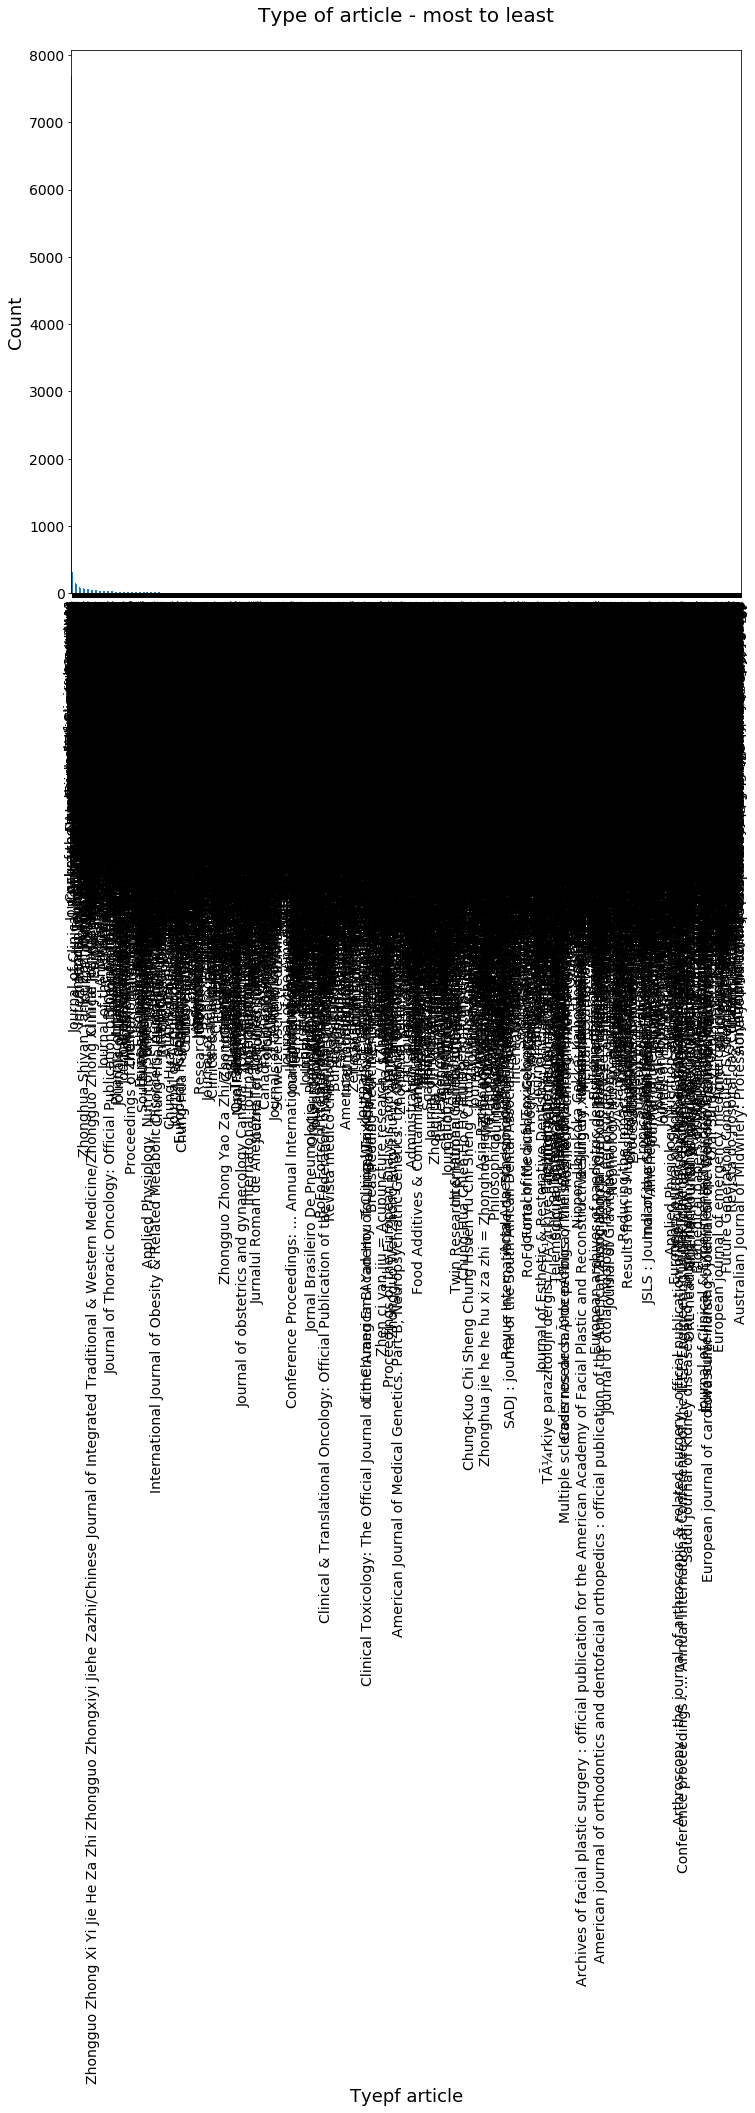

In [11]:
ax = df['Type of article'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Type of article - most to least\n', fontsize=20)
ax.set_xlabel('Tyepf article', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [12]:
df['char_count'] = df['abstract'].str.len() ## this also includes spaces
df[['abstract','char_count']].head()

,abstract,char_count
0,The Beta Blocker Heart Attack Trial (BHAT) is ...,932
1,The Brain Resuscitation Clinical Trial (BRCT) ...,1654
2,The Diabetes Control and Complications Trial (...,1374
3,Within the context of the initiation of practi...,1725
4,The Ottawa Stroke Trials Registry (OSTR) colle...,971


In [13]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['abstract'].apply(lambda x: avg_word(x))
df[['abstract','avg_word']].head()

,abstract,avg_word
0,The Beta Blocker Heart Attack Trial (BHAT) is ...,5.712230
1,The Brain Resuscitation Clinical Trial (BRCT) ...,5.755102
2,The Diabetes Control and Complications Trial (...,5.806931
3,Within the context of the initiation of practi...,5.876494
4,The Ottawa Stroke Trials Registry (OSTR) colle...,6.043478


In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['abstract'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['abstract','stopwords']].head()

,abstract,stopwords
0,The Beta Blocker Heart Attack Trial (BHAT) is ...,43
1,The Brain Resuscitation Clinical Trial (BRCT) ...,89
2,The Diabetes Control and Complications Trial (...,74
3,Within the context of the initiation of practi...,107
4,The Ottawa Stroke Trials Registry (OSTR) colle...,43


In [15]:
df['abstract'].count()

55633

In [31]:
import json

In [30]:
import ast

In [36]:
df2 = df.dropna()

In [39]:
df['Article name'].to_json(r'/home/iqra/BM25/new.json')